In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [148]:
num_file = [i for i in range(11)]

df = [pd.read_csv(f'results_2/summary_{i}.csv', sep='\t') for i in num_file]
num_file

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [167]:
df[10]['#SLHA_file']

0                  ew_38g23u5n.slha
1                  ew_8yu78_5a.slha
2                  ew_xgd95q13.slha
3                  ew_8stp2e2a.slha
4                  ew_uw5kv7jt.slha
                   ...             
96                 ew_aghymm_d.slha
97                 ew_4y6dy5xj.slha
98                 ew_pr2tlw_v.slha
99                 ew_gfwuumch.slha
100    #Has_files_from_1000_to_1100
Name: #SLHA_file, Length: 101, dtype: object

In [150]:
#check all model points are different, not repeated over multiple summary files
check_file = {}
i=0
for d in df:
    for file in d['#SLHA_file']:
        if file not in check_file.keys():
            check_file[file] = 1
        else:
            check_file[file] = check_file[file] + 1
            print('error')
            
#print(check_file)# for key in check_file.keys())

# Combined r_obs

In [170]:
column_index = [i for i in range(1,9)]
column_index.append(10)
column_index.append(12)
column_index.append(14)
column_index.append(15)
column_index.append(16)
#column_index.append(12)
newdf = [pd.read_csv(f'results_2/summary_{i}.csv', sep='\t', 
                     usecols=[df[0].columns[j] for j in column_index]) for i in num_file]

for i in range(11): newdf[i] = newdf[i].dropna()

print(newdf[4].columns)

Index(['m_N1', 'm_N2', 'm_C1', 'm_N3', 'm_N4', 'm_C2', 'r_obs(comb)',
       'r_exp(comb)', 'max_r_obs', 'max_r_exp', 'M1', 'M2', 'Mu'],
      dtype='object')


In [171]:
mass_n1 = []
mass_c1 = []
mass_n2 = []
mass_n3 = []
mass_n4 = []
mass_c2 = []
m1=[]
m2=[]
mu=[]
comb_robs = []
comb_rexp = []
max_robs = []
max_rexp = []
for new in newdf:
    mass_n1 = np.append(mass_n1,new['m_N1'].to_numpy(dtype='float'))
    mass_c1 = np.append(mass_c1,new['m_C1'].to_numpy(dtype='float'))
    mass_n2 = np.append(mass_n2,new['m_N2'].to_numpy(dtype='float'))
    mass_n3 = np.append(mass_n3,new['m_N3'].to_numpy(dtype='float'))
    mass_n4 = np.append(mass_n4,new['m_N4'].to_numpy(dtype='float'))
    mass_c2 = np.append(mass_c2,new['m_C2'].to_numpy(dtype='float'))
    m1 = np.append(m1,new['M1'].to_numpy(dtype='float'))
    m2 = np.append(m2,new['M2'].to_numpy(dtype='float'))
    mu = np.append(mu,new['Mu'].to_numpy(dtype='float'))
    comb_robs = np.append(comb_robs,new['r_obs(comb)'].to_numpy(dtype='float'))
    comb_rexp = np.append(comb_rexp,new['r_exp(comb)'].to_numpy(dtype='float'))
    max_robs = np.append(max_robs,new['max_r_obs'].to_numpy(dtype='float'))
    max_rexp = np.append(max_rexp,new['max_r_exp'].to_numpy(dtype='float'))
    
#a = newdf[' r_obs(comb) '].to_numpy(dtype='float')
print(mass_n1.size, mass_c1.size, comb_robs.size, max_rexp.size, mu.size)
print(comb_robs[334], comb_robs[194], mass_c1[334], mass_c1[194])

1100 1100 1100 1100 1100
1.612447 0.9759387 817.15294 792.33721


In [172]:
#get the indices from comb_r

#sort masses according to indices

M_n1 = mass_n1[np.argsort(comb_robs)]
M_c1 = mass_c1[np.argsort(comb_robs)]
M_n2 = mass_n2[np.argsort(comb_robs)]
M_n3 = mass_n3[np.argsort(comb_robs)]
M_n4 = mass_n4[np.argsort(comb_robs)]
M_c2 = mass_c2[np.argsort(comb_robs)]
M_1  = m1[np.argsort(comb_robs)]
M_2  = m2[np.argsort(comb_robs)]
MU   = mu[np.argsort(comb_robs)]


print(M_n1[-2:])
print(M_c1[-2:])
print(M_c2[-2:])
print(M_1[-2:])
print(M_2[-2:])
print(MU[-2:])
#sort r
crobs = comb_robs[np.argsort(comb_robs)]
#print(comb_robs)

i = np.where(crobs < 0.000e+00)[-1]
j = np.where(crobs < 1.000e+00)[-1]
j = j[i[-1]+1:]
k = np.where(crobs >= 1.000e+00)[-1]

print(len(crobs[i]))
print(len(crobs[j]))
print(len(crobs[k]))

print(M_n1[-10:])
print(mass_n1[-10:])

print(crobs[-10:])
print(comb_robs[-10:])

[77.8222652 20.0752495]
[149.874364 144.378838]
[ 418.400744 2176.0667  ]
[66.9761266 15.5000356]
[117.194448 116.185341]
[ 384.96111 2130.28431]
368
510
222
[41.7476735 33.1212228 33.8187228 39.5067677 29.5448247 21.3610943
 33.0107431 35.5480319 77.8222652 20.0752495]
[178.379009   62.1935603 370.92732   421.907874  227.234297  467.15665
  56.6316558 212.513263  326.973171   36.153491 ]
[ 4.475255  4.536284  4.607903  4.658783  4.686886  4.705488  5.611408
  6.997711 12.064    14.05018 ]
[ 1.571703    2.440129   -1.          0.0246658   0.0164195   0.07551714
  2.106735    2.564242    0.1016534   3.647952  ]


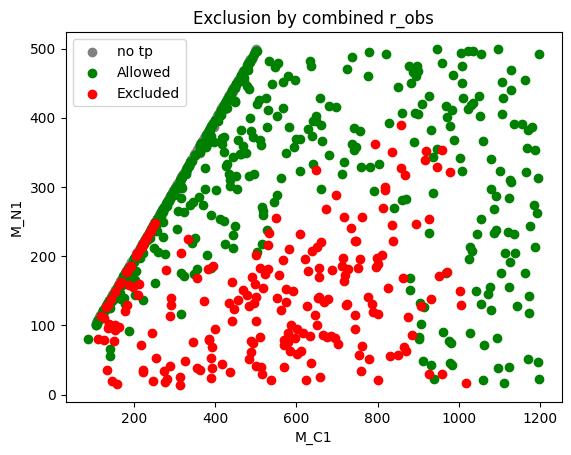

In [173]:
plt.scatter(M_c1[i], M_n1[i], marker='o', color='gray', label='no tp')
plt.scatter(M_c1[j], M_n1[j], marker='o', color='green', label = 'Allowed')
plt.scatter(M_c1[k], M_n1[k], marker='o', color='red', label='Excluded')
plt.title('Exclusion by combined r_obs')
plt.xlabel('M_C1')
plt.ylabel('M_N1')
plt.legend()
#plt.scatter(M_c1, M_n1, c=r_obs , marker='o', cmap=cm, vmin=0)
#plt.colorbar()

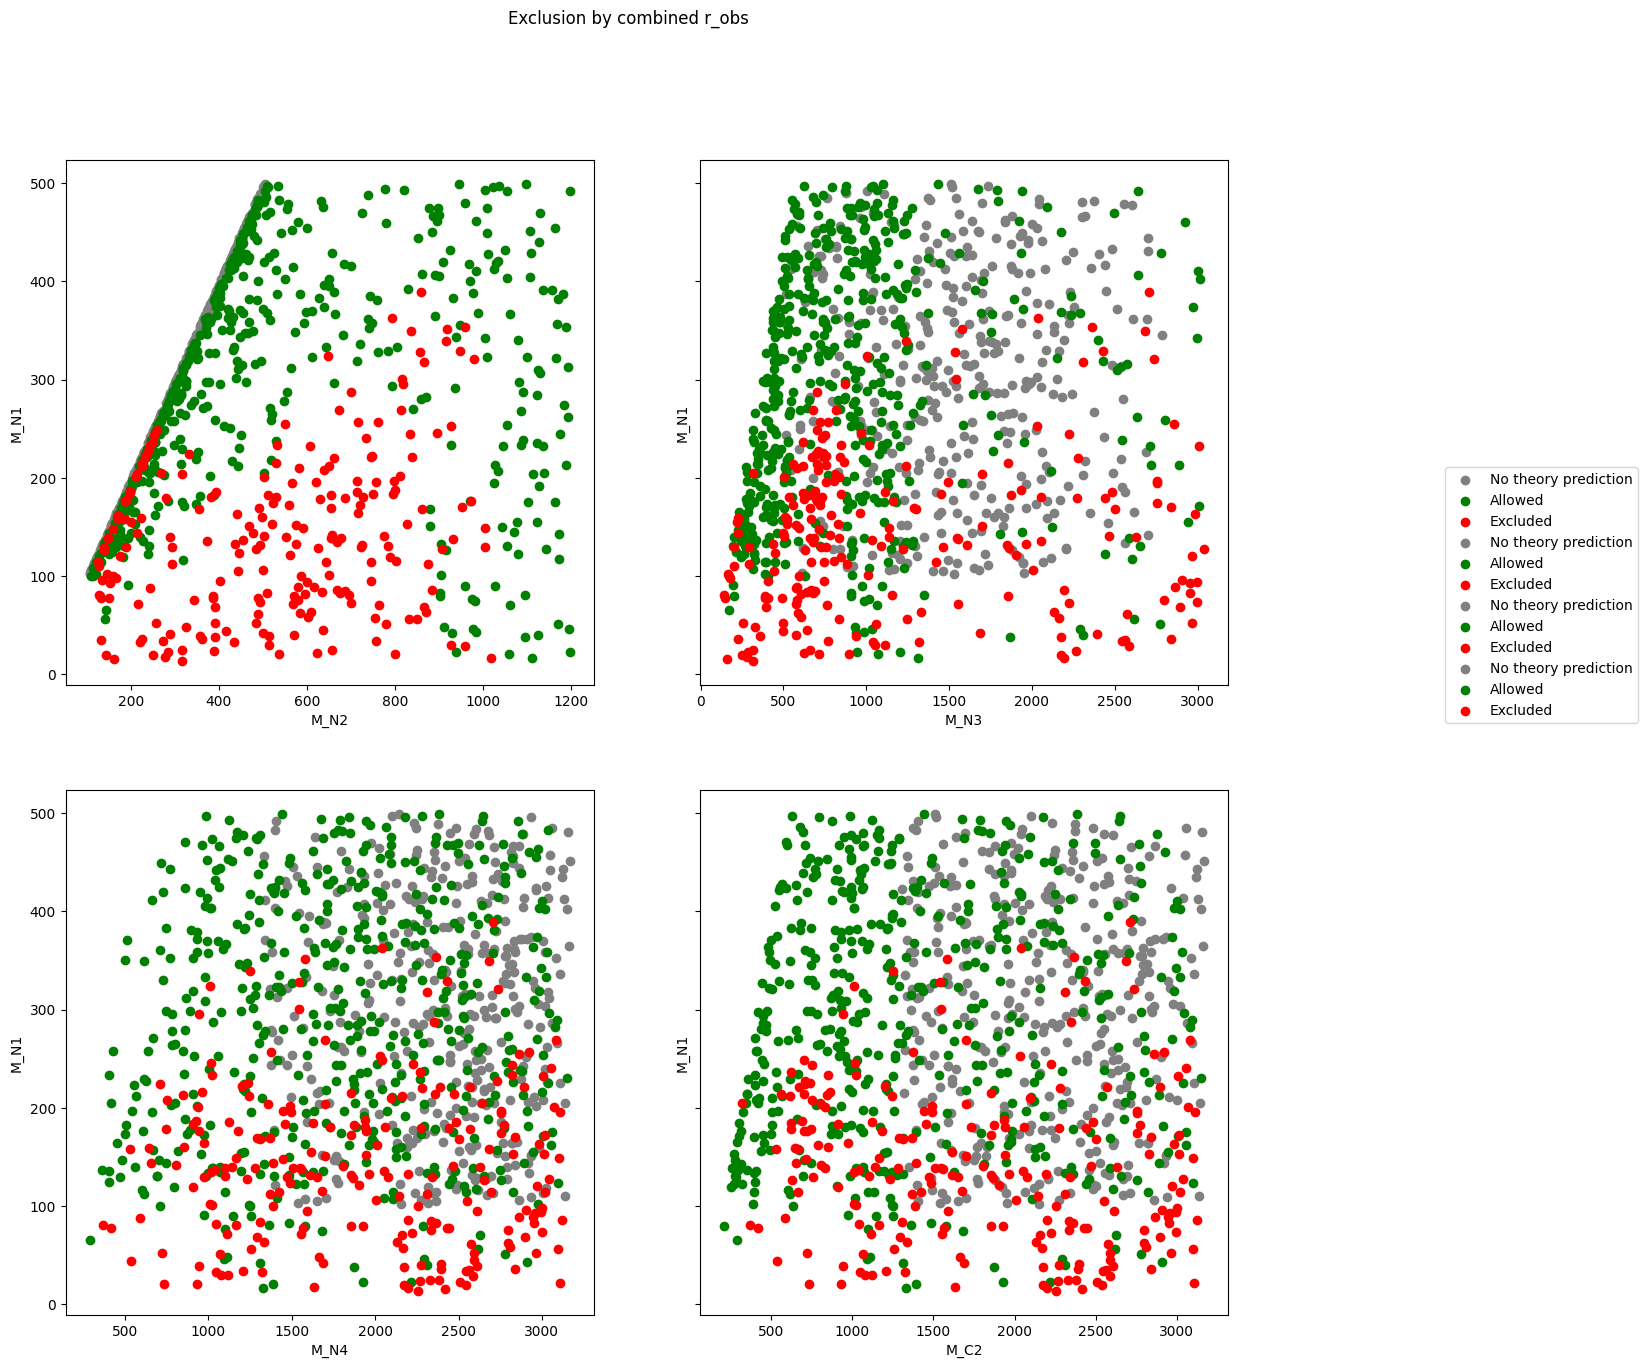

In [174]:
#fig = plt.figure(figsize=[20.0,20.0])
fig,axs = plt.subplots(2,2, sharey=True, figsize=[15.0,15.0])

axs[0,0].scatter(M_n2[i], M_n1[i], marker='o', color='gray', label='No theory prediction')
axs[0,0].scatter(M_n2[j], M_n1[j], marker='o', color='green', label = 'Allowed')
axs[0,0].scatter(M_n2[k], M_n1[k], marker='o', color='red', label='Excluded')
axs[0,0].set_xlabel('M_N2')
axs[0,0].set_ylabel('M_N1')
#axs[0,0].legend()

axs[0,1].scatter(M_n3[i], M_n1[i], marker='o', color='gray', label='No theory prediction')
axs[0,1].scatter(M_n3[j], M_n1[j], marker='o', color='green', label = 'Allowed')
axs[0,1].scatter(M_n3[k], M_n1[k], marker='o', color='red', label='Excluded')
axs[0,1].set_xlabel('M_N3')
axs[0,1].set_ylabel('M_N1')
#axs[0,1].legend()

axs[1,0].scatter(M_n4[i], M_n1[i], marker='o', color='gray', label='No theory prediction')
axs[1,0].scatter(M_n4[j], M_n1[j], marker='o', color='green', label = 'Allowed')
axs[1,0].scatter(M_n4[k], M_n1[k], marker='o', color='red', label='Excluded')
axs[1,0].set_xlabel('M_N4')
axs[1,0].set_ylabel('M_N1')
#axs[1,0].legend()

axs[1,1].scatter(M_c2[i], M_n1[i], marker='o', color='gray', label='No theory prediction')
axs[1,1].scatter(M_c2[j], M_n1[j], marker='o', color='green', label = 'Allowed')
axs[1,1].scatter(M_c2[k], M_n1[k], marker='o', color='red', label='Excluded')
axs[1,1].set_xlabel('M_C2')
axs[1,1].set_ylabel('M_N1')
#axs[1,1].legend()

fig.suptitle('Exclusion by combined r_obs')
fig.legend(bbox_to_anchor=(1.04,0.5),loc='lower left')

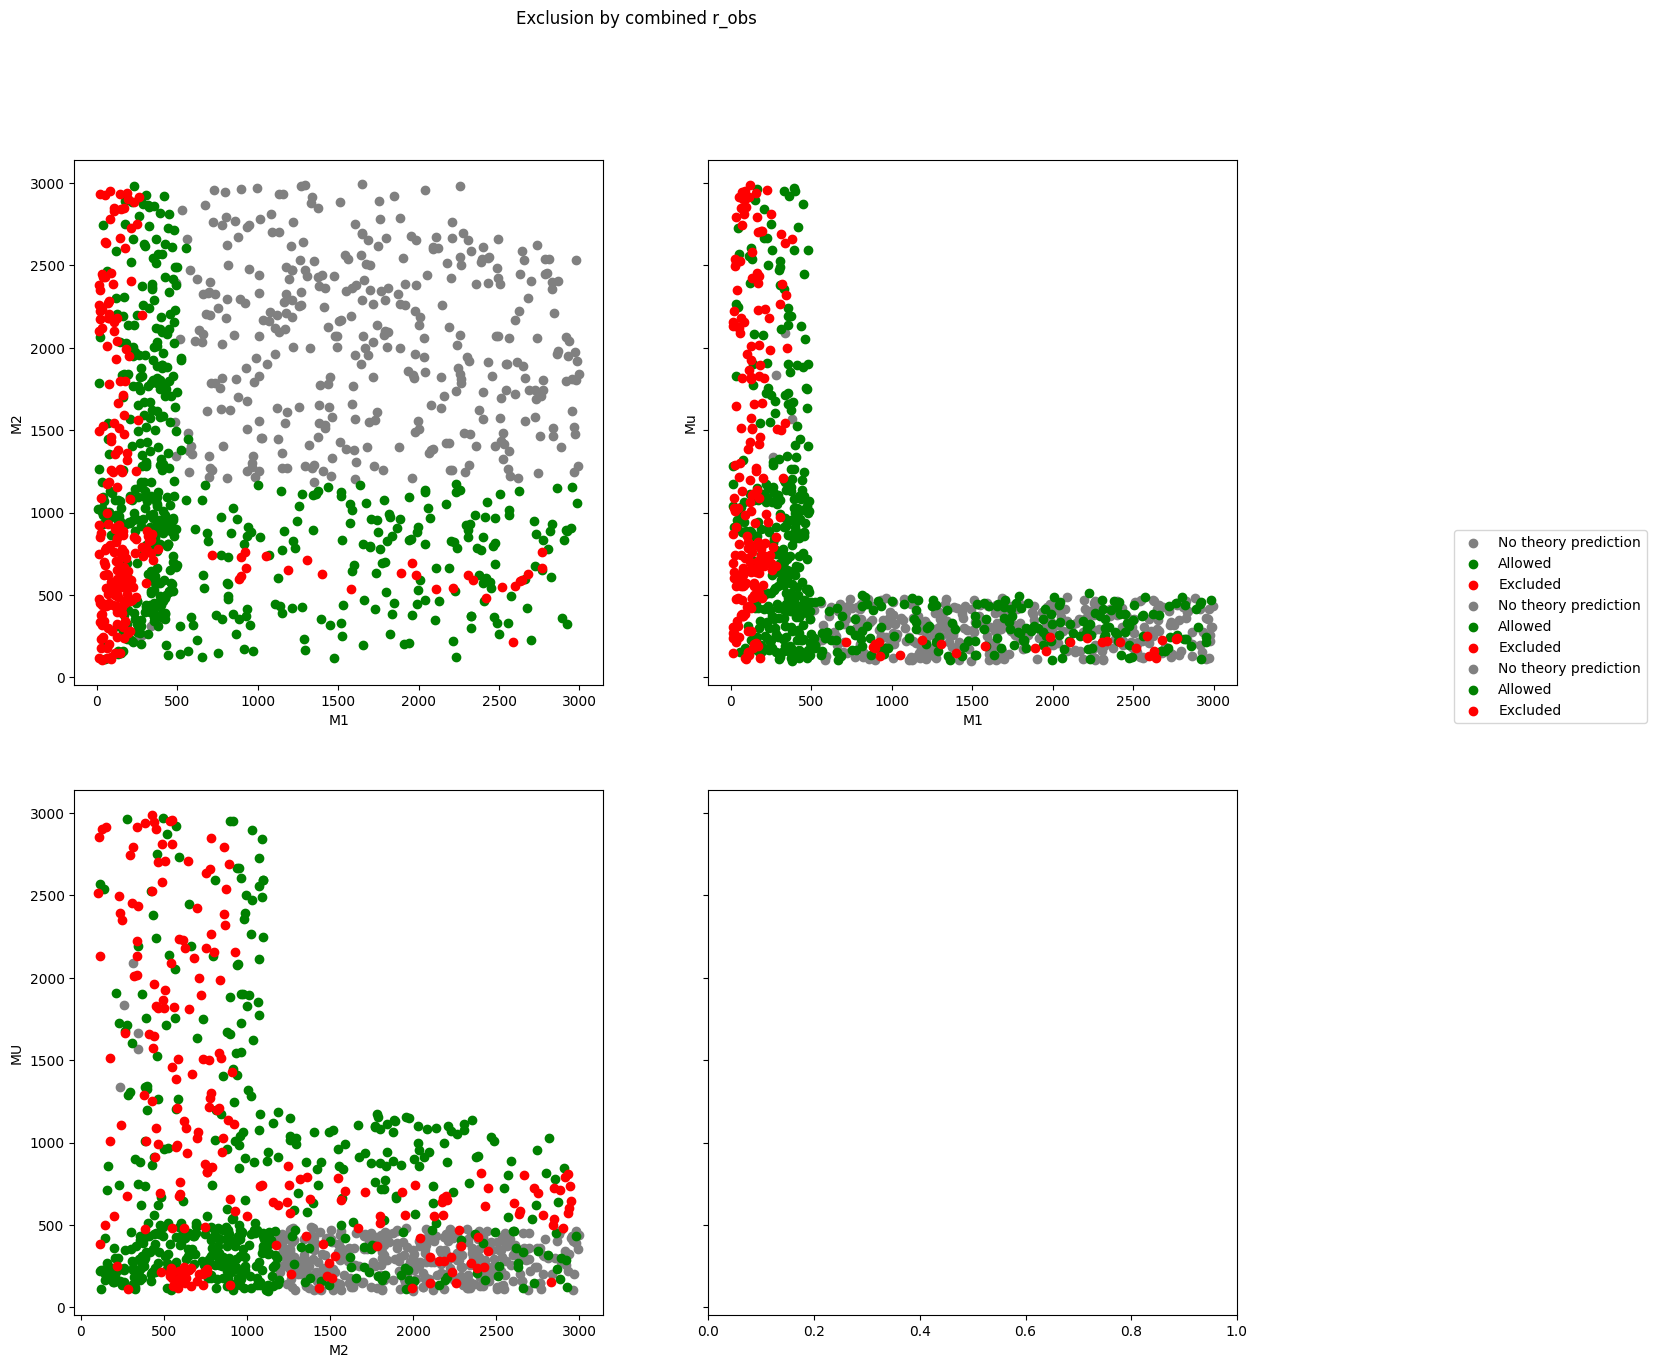

In [175]:
fig,axs = plt.subplots(2,2, sharey=True, figsize=[15.0,15.0])

axs[0,0].scatter(M_1[i], M_2[i], marker='o', color='gray', label='No theory prediction')
axs[0,0].scatter(M_1[j], M_2[j], marker='o', color='green', label = 'Allowed')
axs[0,0].scatter(M_1[k], M_2[k], marker='o', color='red', label='Excluded')
axs[0,0].set_xlabel('M1')
axs[0,0].set_ylabel('M2')
#axs[0,0].legend()

axs[0,1].scatter(M_1[i], MU[i], marker='o', color='gray', label='No theory prediction')
axs[0,1].scatter(M_1[j], MU[j], marker='o', color='green', label = 'Allowed')
axs[0,1].scatter(M_1[k], MU[k], marker='o', color='red', label='Excluded')
axs[0,1].set_xlabel('M1')
axs[0,1].set_ylabel('Mu')
#axs[0,1].legend()

axs[1,0].scatter(M_2[i], MU[i], marker='o', color='gray', label='No theory prediction')
axs[1,0].scatter(M_2[j], MU[j], marker='o', color='green', label = 'Allowed')
axs[1,0].scatter(M_2[k], MU[k], marker='o', color='red', label='Excluded')
axs[1,0].set_xlabel('M2')
axs[1,0].set_ylabel('MU')

fig.suptitle('Exclusion by combined r_obs')
fig.legend(bbox_to_anchor=(1.04,0.5),loc='lower left')

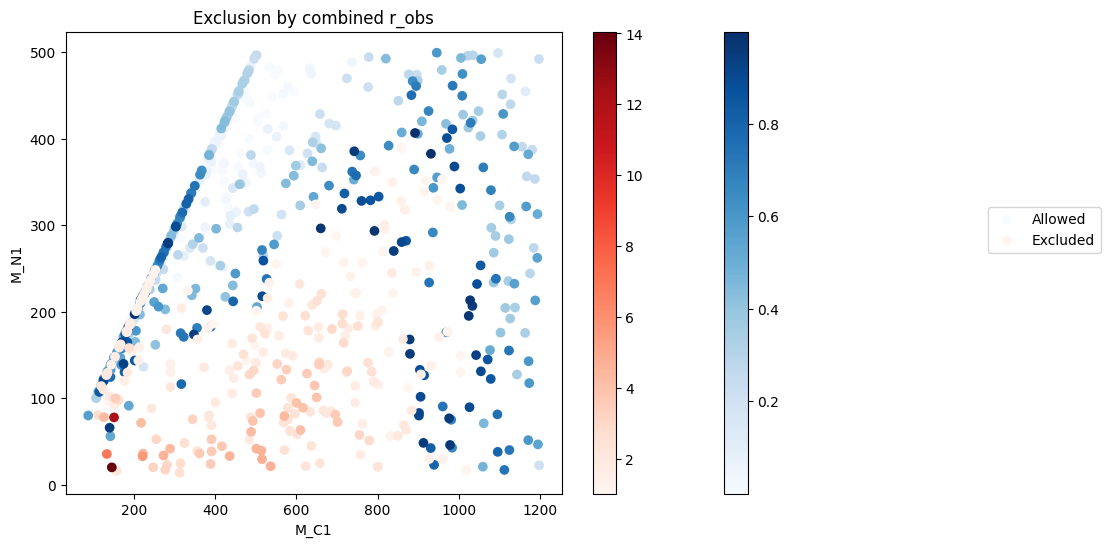

In [176]:
#Degree of exclusion or allowing

fig = plt.figure(figsize=[10.0,6.0])
plt.scatter(M_c1[j], M_n1[j], c=crobs[j], marker='o', cmap='Blues', label = 'Allowed')
plt.colorbar()
plt.scatter(M_c1[k], M_n1[k], c=crobs[k], marker='o', cmap='Reds', label='Excluded')
plt.title('Exclusion by combined r_obs')
plt.xlabel('M_C1')
plt.ylabel('M_N1')
plt.colorbar()

fig.legend(bbox_to_anchor=(1.04,0.5),loc='lower left')

# Exclusion by combined r_exp

In [177]:
#get the indices from comb_r

#sort mes according to indices

m_n1 = mass_n1[np.argsort(comb_rexp)]
m_c1 = mass_c1[np.argsort(comb_rexp)]
m_n2 = mass_n2[np.argsort(comb_rexp)]
m_n3 = mass_n3[np.argsort(comb_rexp)]
m_n4 = mass_n4[np.argsort(comb_rexp)]
m_c2 = mass_c2[np.argsort(comb_rexp)]
M1  = m1[np.argsort(comb_rexp)]
M2  = m2[np.argsort(comb_rexp)]
Mu   = mu[np.argsort(comb_rexp)]

print(m_n1[-2:])
print(m_c1[-2:])
print(m_c2[-2:])
#sort r
crexp = comb_rexp[np.argsort(comb_rexp)]
#print(comb_rexp)

l = np.where(crexp < 0.000000e+00)[-1]
m = np.where(crexp < 1.000e+00)[-1]
m = m[l[-1]+1:]
n = np.where(crexp >= 1.000e+00)[-1]

#print(i)
print(len(crexp[l]))
print(len(crexp[m]))
print(len(crexp[n]))
print(crexp[-10:])
print(comb_rexp[n][-10:])
#print(crexp)

[20.0752495 77.8222652]
[144.378838 149.874364]
[2176.0667    418.400744]
368
470
262
[ 4.867925  4.877417  4.951164  5.044309  5.137494  5.36079   5.716461
  6.63389  11.61855  12.31768 ]
[ 1.54746     2.400212   -1.          0.0230879   0.04368839  0.08094844
  2.610225    2.933565    0.1072326   4.458951  ]


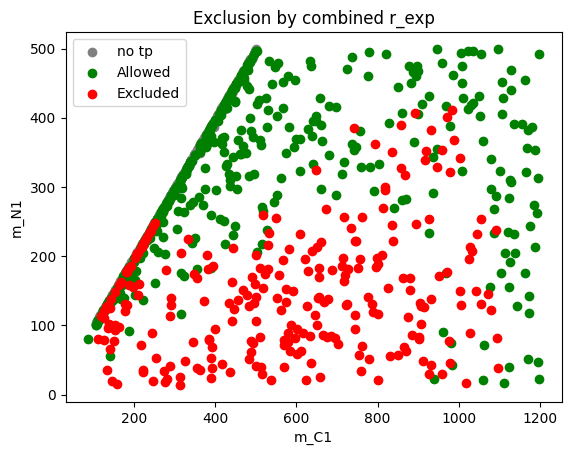

In [178]:
plt.scatter(m_c1[l], m_n1[l], marker='o', color='gray', label='no tp')
plt.scatter(m_c1[m], m_n1[m], marker='o', color='green', label = 'Allowed')
plt.scatter(m_c1[n], m_n1[n], marker='o', color='red', label='Excluded')
plt.title('Exclusion by combined r_exp')
plt.xlabel('m_C1')
plt.ylabel('m_N1')
plt.legend()

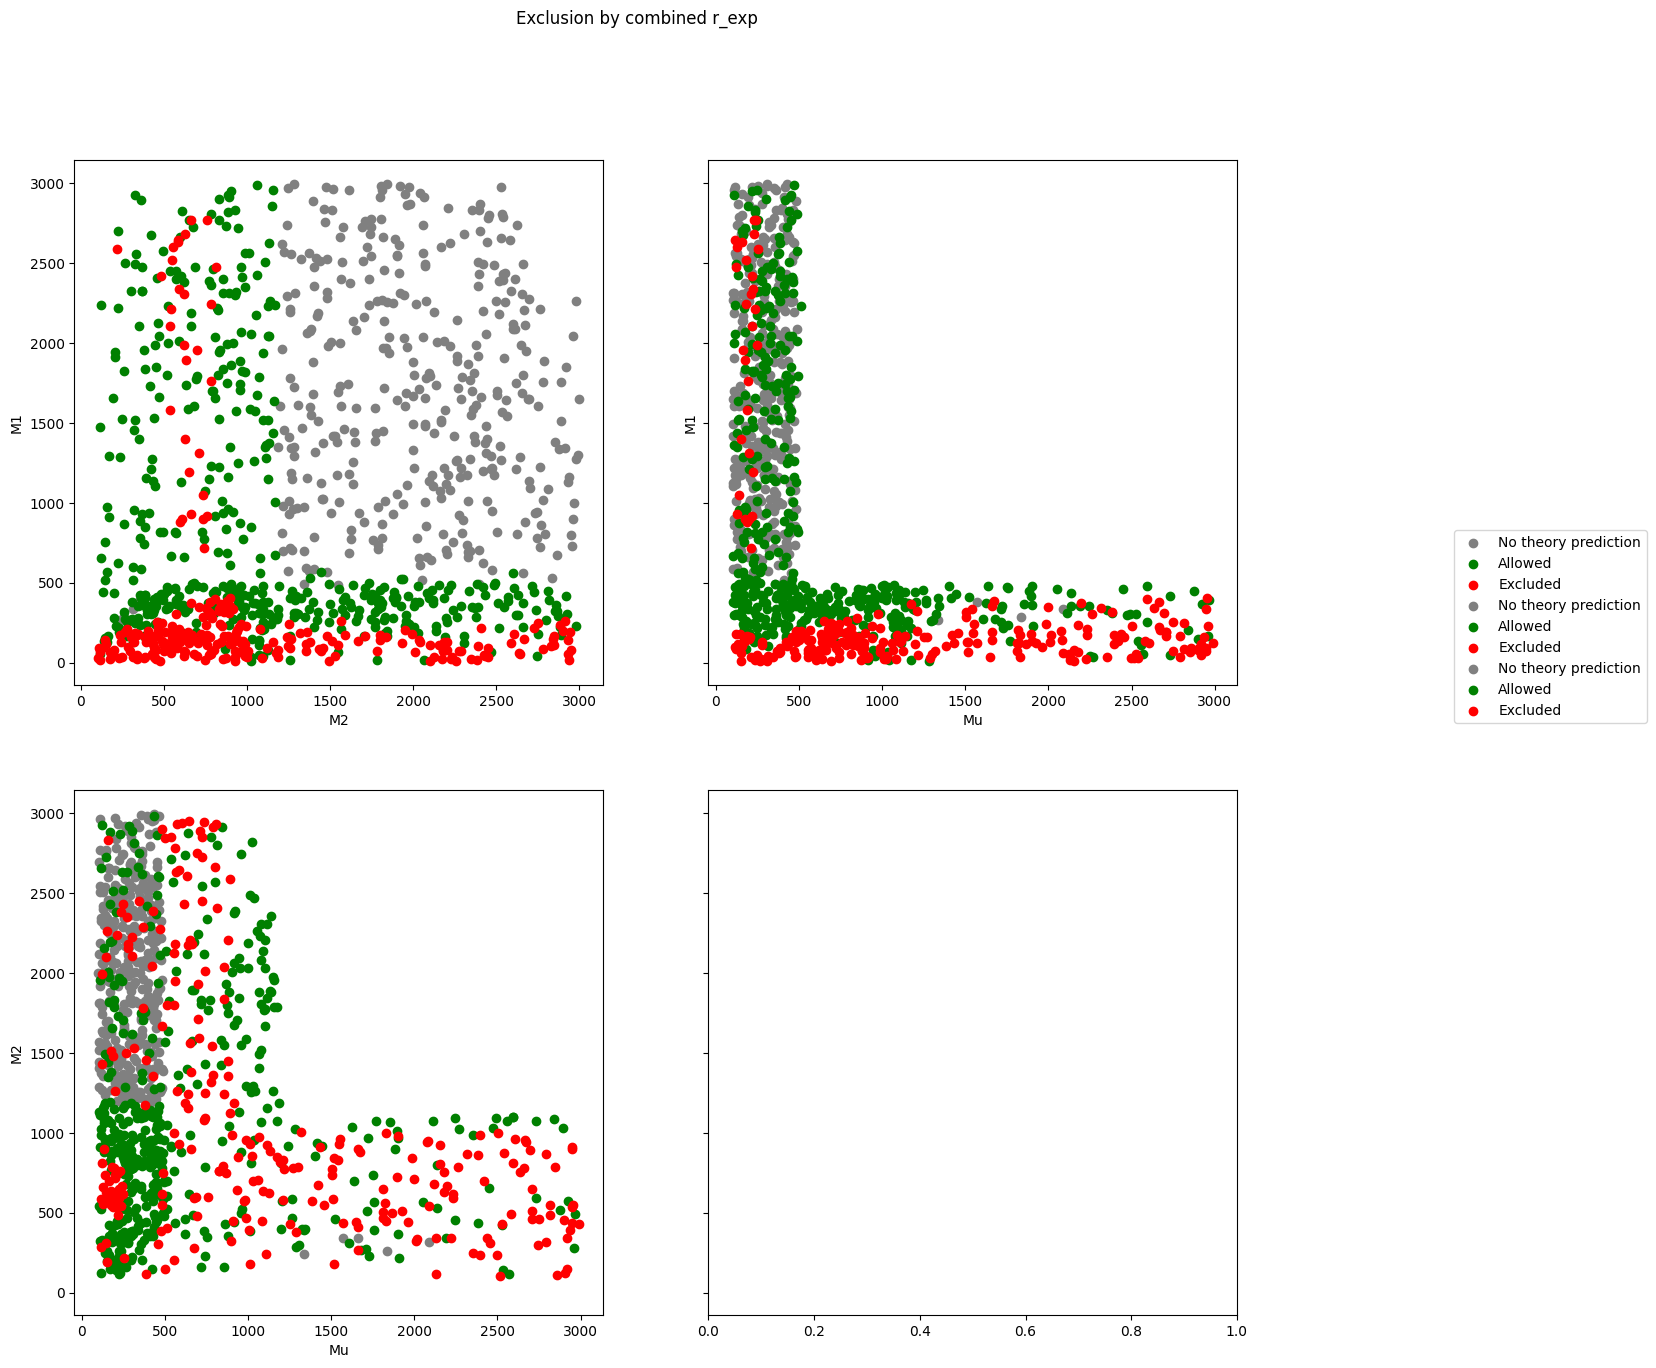

In [179]:
fig,axs = plt.subplots(2,2, sharey=True, figsize=[15.0,15.0])

axs[0,0].scatter(M2[l], M1[l], marker='o', color='gray', label='No theory prediction')
axs[0,0].scatter(M2[m], M1[m], marker='o', color='green', label = 'Allowed')
axs[0,0].scatter(M2[n], M1[n], marker='o', color='red', label='Excluded')
axs[0,0].set_xlabel('M2')
axs[0,0].set_ylabel('M1')
#axs[0,0].legend()

axs[0,1].scatter(Mu[l], M1[l], marker='o', color='gray', label='No theory prediction')
axs[0,1].scatter(Mu[m], M1[m], marker='o', color='green', label = 'Allowed')
axs[0,1].scatter(Mu[n], M1[n], marker='o', color='red', label='Excluded')
axs[0,1].set_xlabel('Mu')
axs[0,1].set_ylabel('M1')
#axs[0,1].legend()

axs[1,0].scatter(Mu[l], M2[l], marker='o', color='gray', label='No theory prediction')
axs[1,0].scatter(Mu[m], M2[m], marker='o', color='green', label = 'Allowed')
axs[1,0].scatter(Mu[n], M2[n], marker='o', color='red', label='Excluded')
axs[1,0].set_xlabel('Mu')
axs[1,0].set_ylabel('M2')

fig.suptitle('Exclusion by combined r_exp')
fig.legend(bbox_to_anchor=(1.04,0.5),loc='lower left')

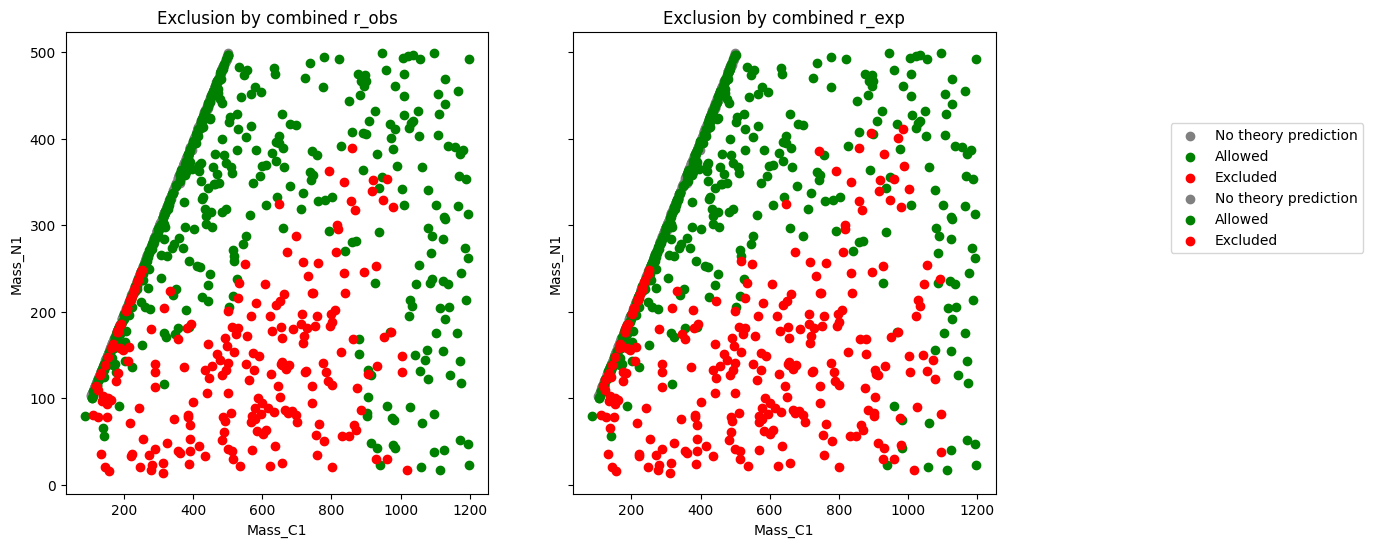

In [180]:
fig,axs = plt.subplots(1,2, sharey=True, figsize=[12.0,6.0])


axs[0].scatter(M_c1[i], M_n1[i], marker='o', color='gray', label='No theory prediction')
axs[0].scatter(M_c1[j], M_n1[j], marker='o', color='green', label = 'Allowed')
axs[0].scatter(M_c1[k], M_n1[k], marker='o', color='red', label='Excluded')
axs[0].set_xlabel('Mass_C1')
axs[0].set_ylabel('Mass_N1')
axs[0].set_title('Exclusion by combined r_obs')
#axs[0].legend()

axs[1].scatter(m_c1[l], m_n1[l], marker='o', color='gray', label='No theory prediction')
axs[1].scatter(m_c1[m], m_n1[m], marker='o', color='green', label = 'Allowed')
axs[1].scatter(m_c1[n], m_n1[n], marker='o', color='red', label='Excluded')
axs[1].set_xlabel('Mass_C1')
axs[1].set_ylabel('Mass_N1')
axs[1].set_title('Exclusion by combined r_exp')
#axs[0,1].legend()
fig.legend(bbox_to_anchor=(1.04,0.5),loc='lower left')

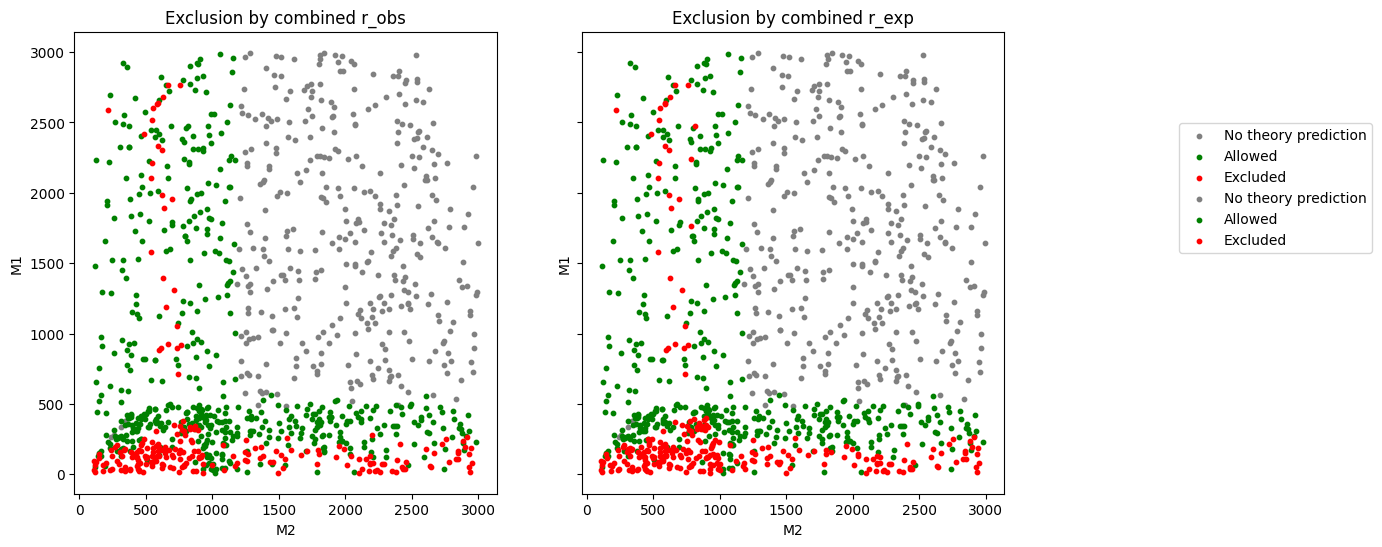

In [181]:
fig,axs = plt.subplots(1,2, sharey=True, figsize=[12.0,6.0])

axs[0].scatter(M_2[i], M_1[i], marker='o', s=10, color='gray', label='No theory prediction')
axs[0].scatter(M_2[j], M_1[j], marker='o', s=10,  color='green', label = 'Allowed')
axs[0].scatter(M_2[k], M_1[k], marker='o', s=10, color='red', label='Excluded')
axs[0].set_xlabel('M2')
axs[0].set_ylabel('M1')
axs[0].set_title('Exclusion by combined r_obs')

axs[1].scatter(M2[l], M1[l], marker='o', s=10,  color='gray', label='No theory prediction')
axs[1].scatter(M2[m], M1[m], marker='o', s=10, color='green', label = 'Allowed')
axs[1].scatter(M2[n], M1[n], marker='o', s=10, color='red', label='Excluded')
axs[1].set_xlabel('M2')
axs[1].set_ylabel('M1')
axs[1].set_title('Exclusion by combined r_exp')

fig.legend(bbox_to_anchor=(1.04,0.5),loc='lower left')

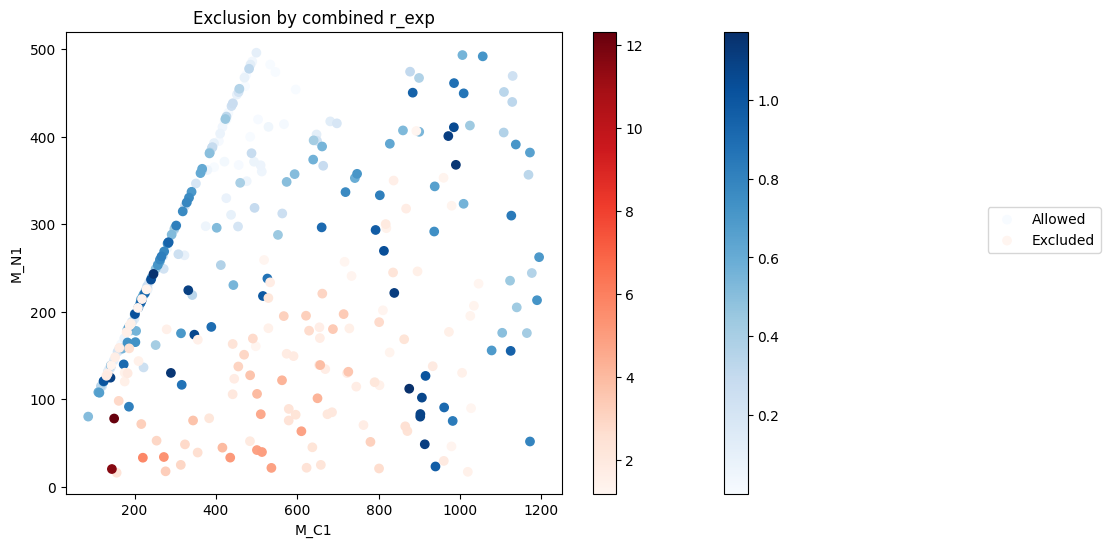

In [18]:
fig = plt.figure(figsize=[10.0,6.0])
plt.scatter(m_c1[j], m_n1[j], c=crexp[j], marker='o', cmap='Blues', label = 'Allowed')
plt.colorbar()
plt.scatter(m_c1[k], m_n1[k], c=crexp[k], marker='o', cmap='Reds', label='Excluded')
plt.title('Exclusion by combined r_exp')
plt.xlabel('M_C1')
plt.ylabel('M_N1')
plt.colorbar()

fig.legend(bbox_to_anchor=(1.04,0.5),loc='lower left')

# Ratio plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.2582738585302592 1.6483185387639978


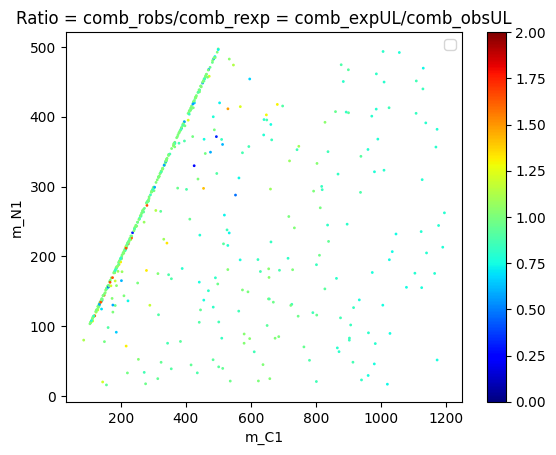

In [19]:
comb_ratio = comb_robs/comb_rexp 
#comb_ratio <1 -> overfluctuation, >1 -> underfluctuation
print(min(comb_ratio), max(comb_ratio))
plt.scatter(mass_c1, mass_n1, c=comb_ratio, cmap='jet', s=1, marker='o', vmin=0.0, vmax=2.0)
plt.title('Ratio = comb_robs/comb_rexp = comb_expUL/comb_obsUL')
plt.xlabel('m_C1')
plt.ylabel('m_N1')
plt.colorbar()
plt.legend()

# Combination at each point

In [182]:
#newdf_4 = pd.read_csv('results/summary_4.csv', sep='\t', usecols=[' M_N1 ',' M_C1 ',' Combination '])
newdf_comb = [pd.read_csv(f'results_2/summary_{i}.csv', sep='\t', usecols=['#SLHA_file','m_N1','m_C1','m_C2',
                                                                           'Combination','M1','M2']) 
              for i in num_file]
for i in range(len(num_file)): newdf_comb[i] = newdf_comb[i].dropna()
print(len(newdf_comb))

11


In [183]:
file = []
m_n1 = []
m_c1 = []
m_c2 = []
M1 = []
M2 = []
comb = []

for new in newdf_comb:
    file = np.append(file, new['#SLHA_file'].to_numpy(dtype='str'))
    m_n1 = np.append(m_n1, new['m_N1'].to_numpy(dtype='float'))
    m_c1 = np.append(m_c1, new['m_C1'].to_numpy(dtype='float'))
    m_c2 = np.append(m_c2, new['m_C2'].to_numpy(dtype='float'))
    M1 = np.append(M1, new['M1'].to_numpy(dtype='float'))
    M2 = np.append(M2, new['M2'].to_numpy(dtype='float'))
    comb = np.append(comb, new['Combination'].to_numpy(dtype='str'))

print(file[:10])
print(comb[:10])
#print(np.where(comb == 'ATLAS-SUSY-2018-41,CMS-SUS-21-002')[-1])
print(np.where(file == 'ew_m1x2xm8s.slha'))
print(np.where(file == 'ew_i_kl9ago.slha'))
print(comb[334])

['ew_gv64zjq2.slha' 'ew_3psnuh5e.slha' 'ew_ay_4glqp.slha'
 'ew_m35te10c.slha' 'ew_08dvyl5b.slha' 'ew_l59totsq.slha'
 'ew_idrfdsxj.slha' 'ew_977eof11.slha' 'ew_ptedvsp0.slha'
 'ew_ezigfamu.slha']
['-1' '-1' '-1' '-1' '-1' 'CMS-SUS-16-048' '-1'
 'ATLAS-SUSY-2018-41,CMS-SUS-21-002' '-1'
 'ATLAS-SUSY-2018-05-ewk,ATLAS-SUSY-2018-41,ATLAS-SUSY-2019-08,CMS-SUS-13-012,CMS-SUS-21-002']
(array([334]),)
(array([194]),)
ATLAS-SUSY-2018-05-ewk,ATLAS-SUSY-2018-41,ATLAS-SUSY-2019-08,CMS-SUS-13-012,CMS-SUS-21-002


In [184]:
comb_dict = {}
for value in comb:
    #print(m_n1[key])
    if value not in comb_dict.keys():
        comb_dict[value] = {'num_comb':1}
        #print(value)
        if value=='-1': comb_dict[value]['len_comb'] = 0 
        elif ',' in value: comb_dict[value]['len_comb'] = len(value.split(','))
        else: comb_dict[value]['len_comb'] = 1
        #index = np.where(comb[value])
        #comb_dict[value]['M_N1'] = [m_n1[key]]
        #comb_dict[value]['M_C1'] = [m_c1[key]]
    elif value in comb_dict.keys():
        comb_dict[value]['num_comb'] = comb_dict[value]['num_comb'] + 1
        #comb_dict[value]['M_N1'].append(m_n1[key])
        #comb_dict[value]['M_C1'].append(m_c1[key])
        
for key in comb_dict.keys():
    indices = np.where(comb == key)[-1]
    comb_dict[key]['M_N1'] = [m_n1[i] for i in indices]
    comb_dict[key]['M_C1'] = [m_c1[i] for i in indices]
    comb_dict[key]['M_C2'] = [m_c2[i] for i in indices]
    comb_dict[key]['M1'] = [M1[i] for i in indices]
    comb_dict[key]['M2'] = [M2[i] for i in indices]
    comb_dict[key]['File'] = [file[i] for i in indices]
        
#print(try_newdict)
print(len(comb_dict['-1']['M1']))
print(len(comb_dict.keys()))

368
55


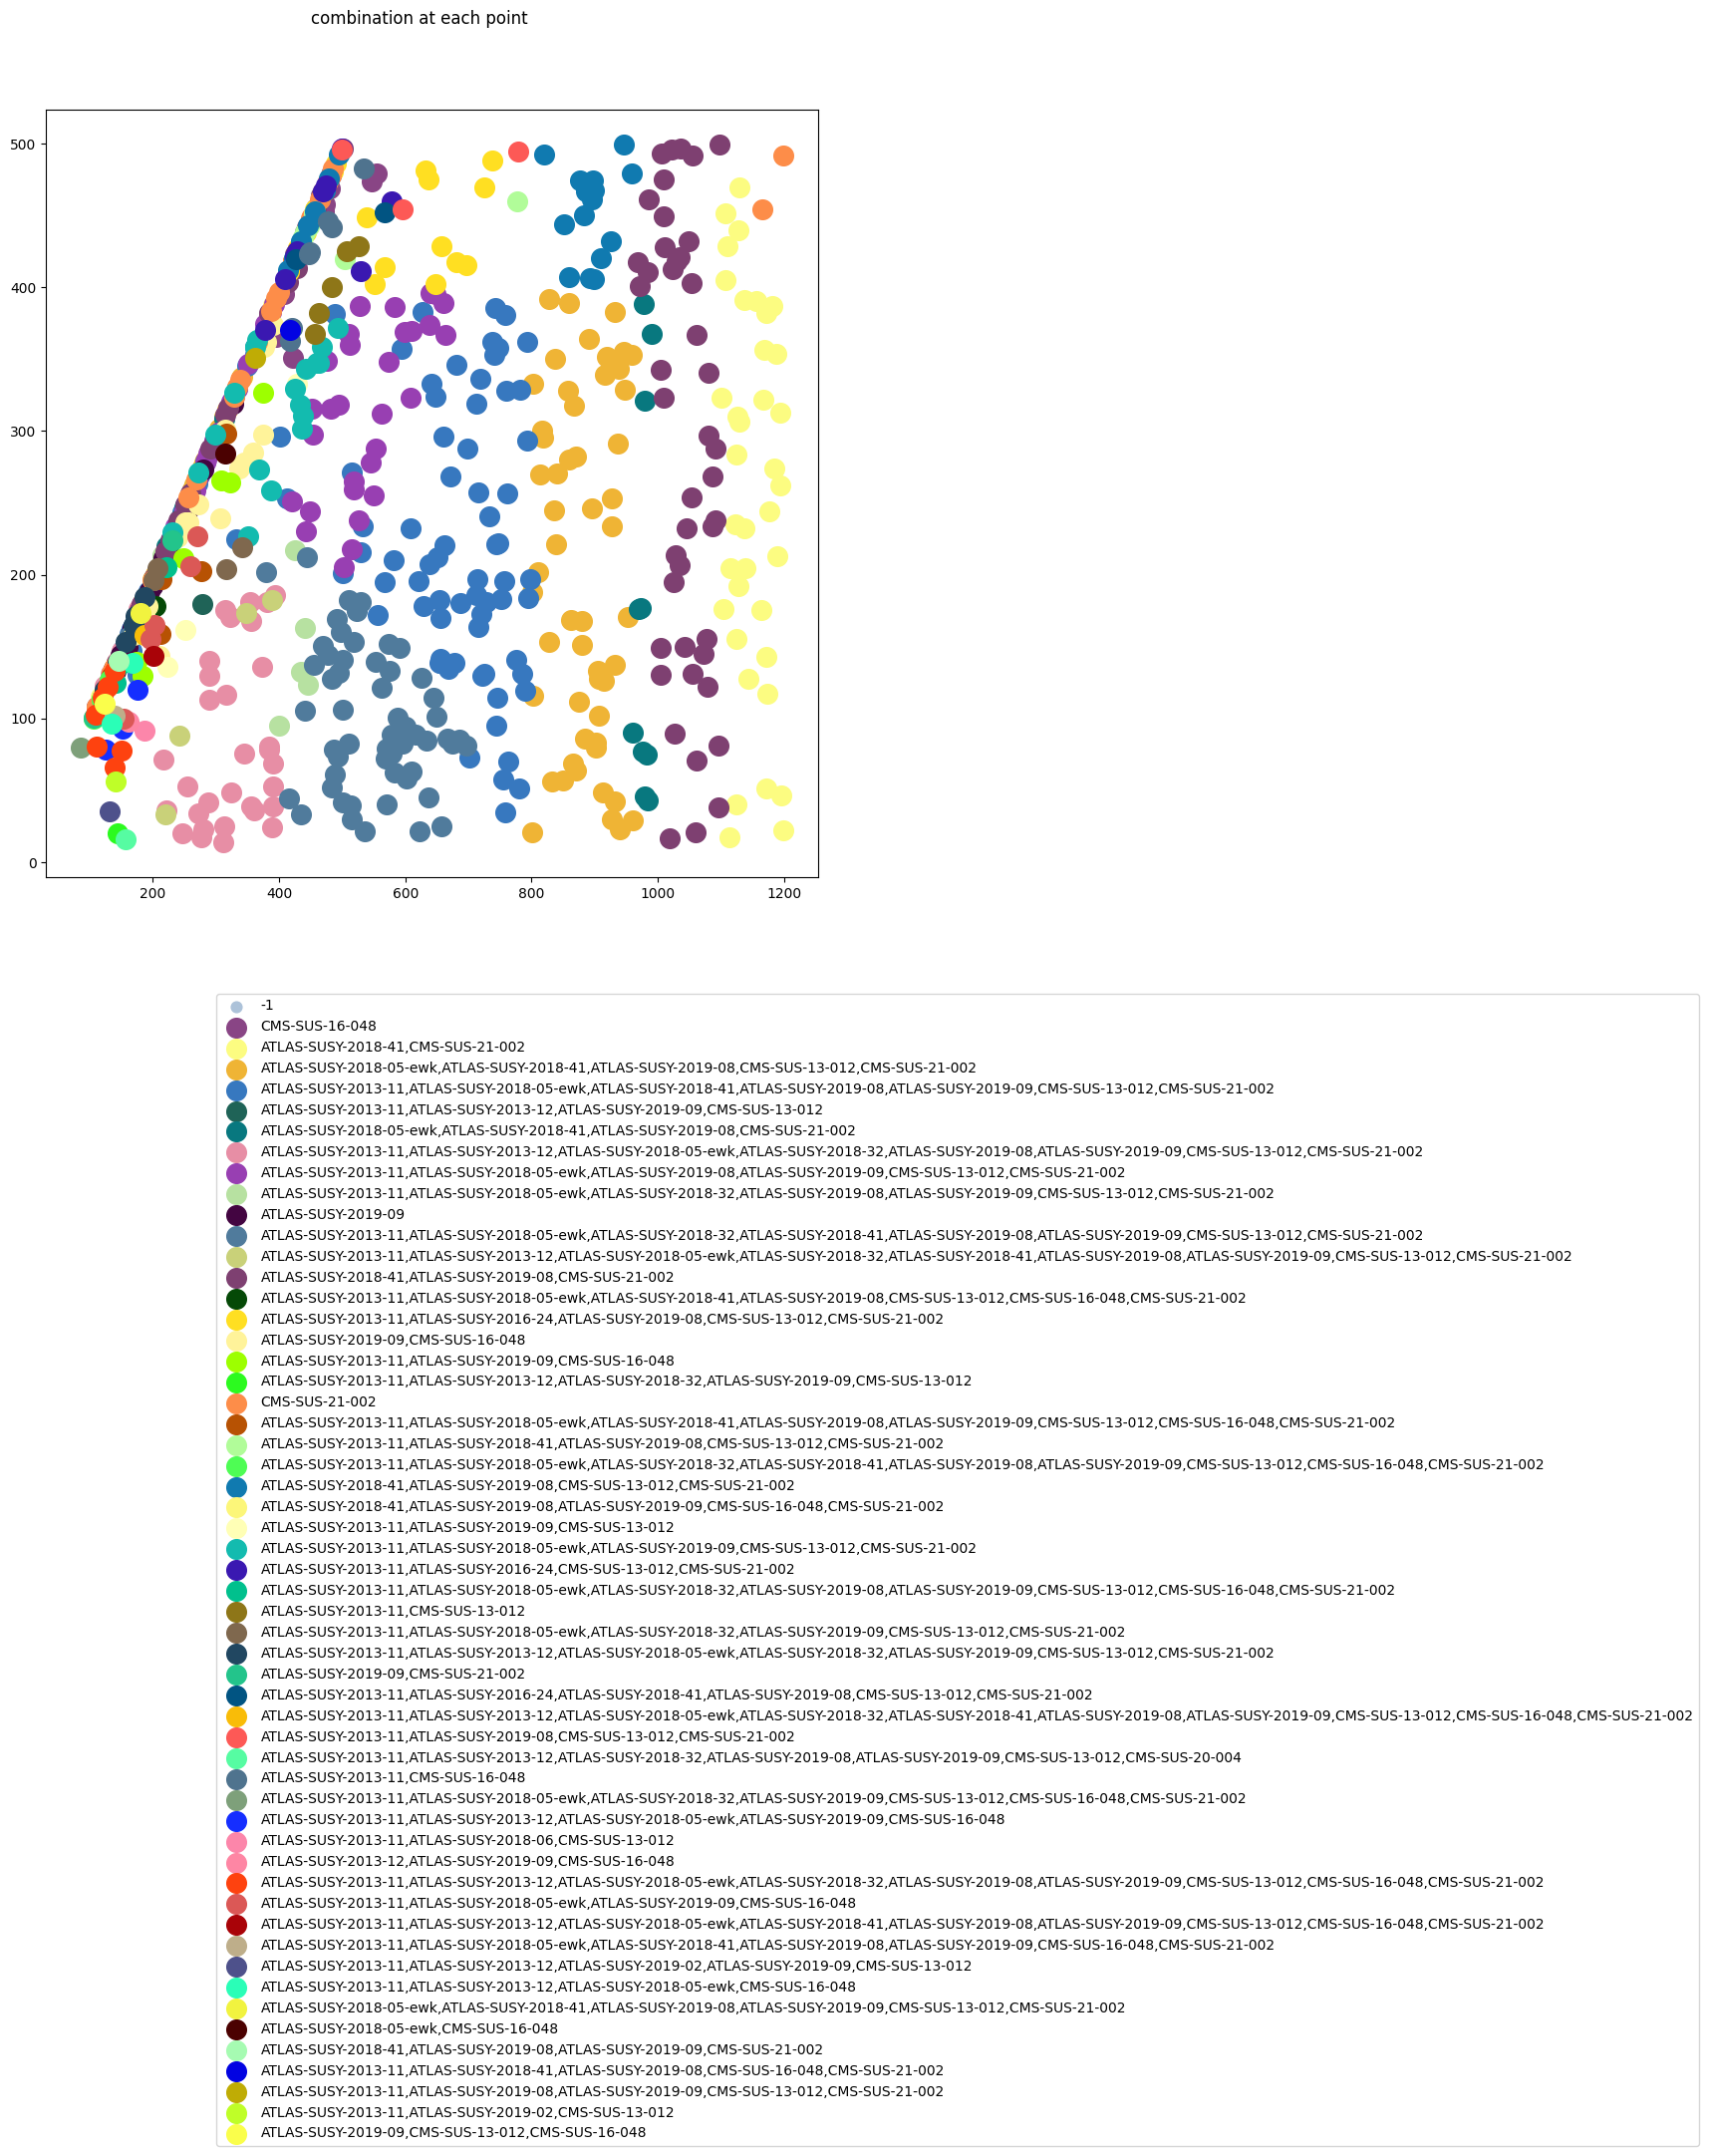

In [185]:
fig,axs = plt.subplots(figsize=[10.0,10.0])
import matplotlib.colors as mcolors
colours = [col for col in mcolors.XKCD_COLORS.keys()]
colours= colours[0::5]

i = 0
#print(cmap[0])
for key,value in comb_dict.items():
    if key == '-1':
        axs.scatter(comb_dict[key]['M_C1'], comb_dict[key]['M_N1'], s=60, marker='o', label=key, color=colours[i])
        axs.set_xlabel=('M_C1')
        axs.set_ylabel = ('M_N1')
    else:
        axs.scatter(comb_dict[key]['M_C1'], comb_dict[key]['M_N1'], s=200, marker='o', label=key, color=colours[i])
        axs.set_xlabel=('M_C1')
        axs.set_ylabel = ('M_N1')
    i = i+1
    
fig.suptitle('combination at each point')
fig.legend(bbox_to_anchor=(1.04,0),loc='upper center')

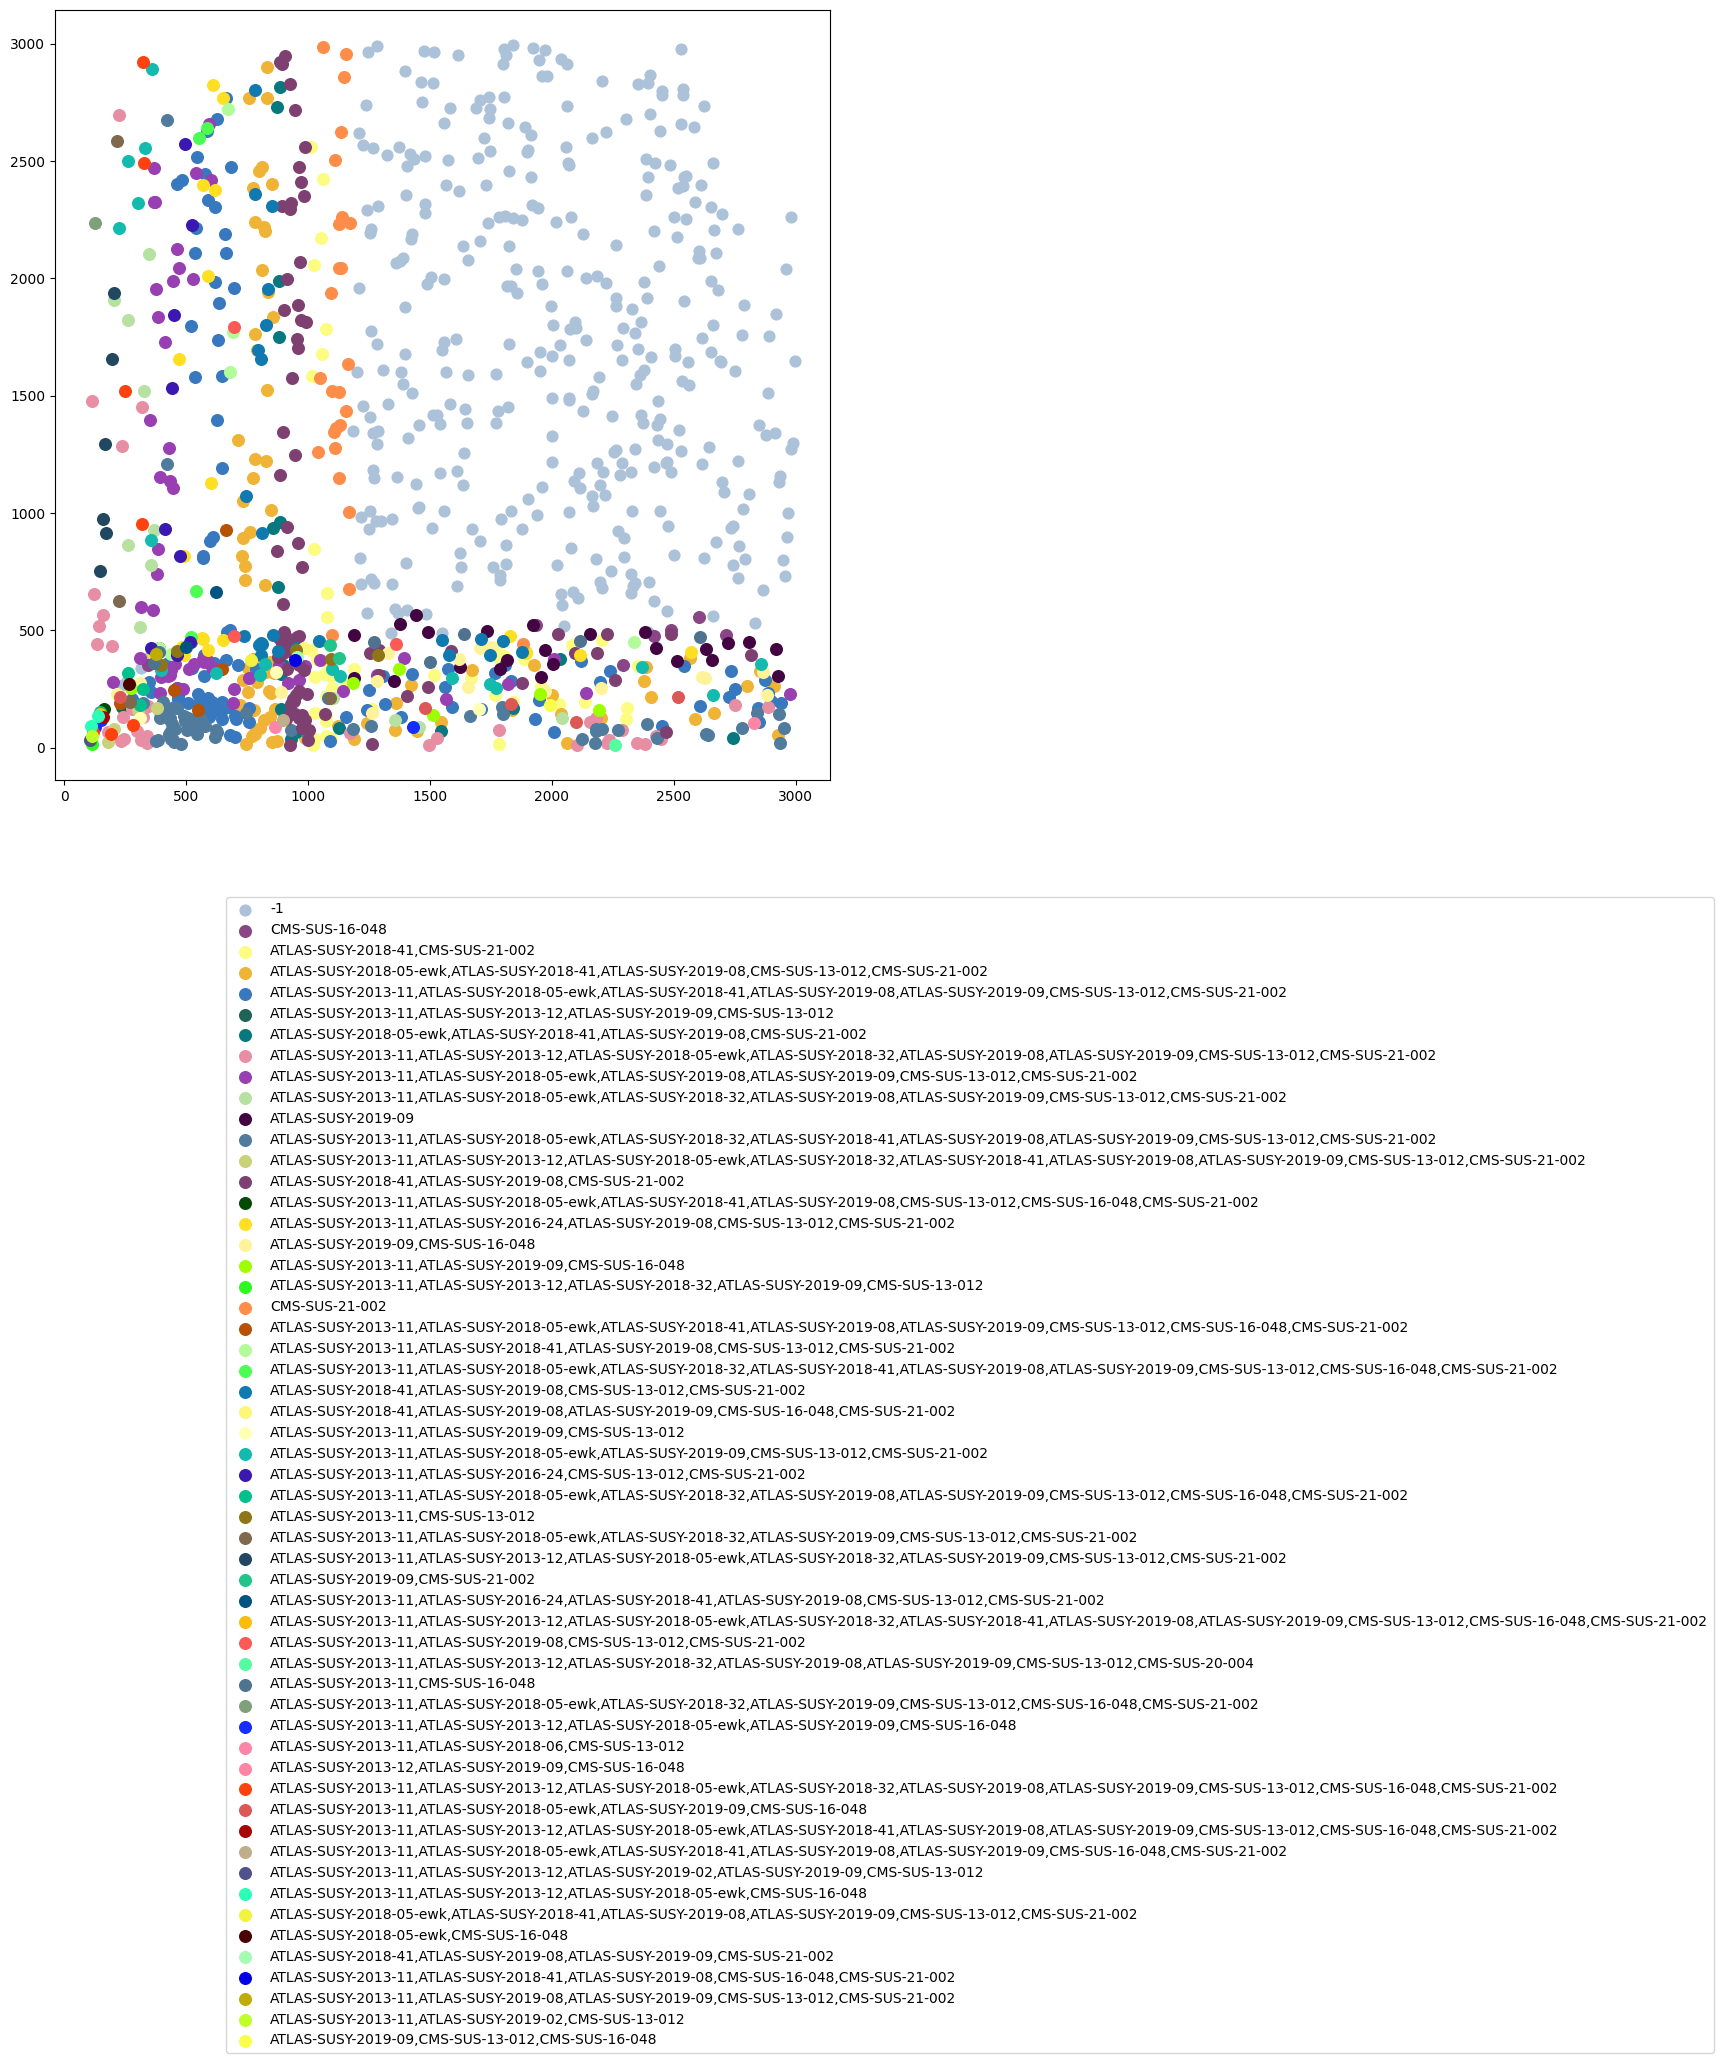

In [186]:
fig,axs = plt.subplots(1,1,figsize=[10.0,10.0])
import matplotlib.colors as mcolors
colours = [col for col in mcolors.XKCD_COLORS.keys()]
colours= colours[0::5]

i=0
for key,value in comb_dict.items():
    if key == '-1':
        axs.scatter(comb_dict[key]['M2'], comb_dict[key]['M1'], s=60, marker='o', label=key, color=colours[i])
    else:
        axs.scatter(comb_dict[key]['M2'], comb_dict[key]['M1'], s=70, marker='o', label=key, color=colours[i])
    i = i+1
    
axs.set_xlabel=('M2')
axs.set_ylabel = ('M1')
fig.legend(bbox_to_anchor=(1.04,0),loc='upper center')

# Plotting likelihood for two points

In [187]:
combcheck = [['ATLAS-SUSY-2013-11','ATLAS-SUSY-2018-05-ewk','ATLAS-SUSY-2018-41','ATLAS-SUSY-2019-08',
             'ATLAS-SUSY-2019-09','CMS-SUS-13-012','CMS-SUS-21-002'],['ATLAS-SUSY-2018-05-ewk','ATLAS-SUSY-2018-41',
             'ATLAS-SUSY-2019-08','CMS-SUS-13-012','CMS-SUS-21-002']]

comb_ana = [ana for ana in comb_dict.keys()]

for ana,val in comb_dict.items():
    if comb_ana[4] == ana:
        print(comb_dict[ana]['M_N1'][19])
        print(comb_dict[ana]['M_C1'][19])
        print(comb_dict[ana]['File'][19])
        #plt.scatter(comb_dict[ana]['M_C1'][19], comb_dict[ana]['M_N1'][19], s=70, marker='o', label=ana, color='blue')
    if comb_ana[3] == ana:
        print(comb_dict[ana]['M_N1'][26])
        print(comb_dict[ana]['M_C1'][26])
        print(comb_dict[ana]['File'][26])
        #plt.scatter(comb_dict[ana]['M_C1'][26], comb_dict[ana]['M_N1'][26], s=70, marker='o', label=ana, color='orange')
#plt.xlim(0,1200) 
#plt.ylim(0,500)

300.1677
817.15294
ew_m1x2xm8s.slha
293.427231
792.33721
ew_i_kl9ago.slha


In [193]:
import os,sys
import sys; sys.path.append('.')
from smodels.tools.modelTester import getCombiner

In [194]:
expected = False
normalize = True
muvals = np.linspace(-1.,3.,200)

In [195]:
slhafile = [comb_dict[comb_ana[3]]['File'][26], comb_dict[comb_ana[4]]['File'][19]]
parfile = os.path.expanduser("~/smodels/./parameters.ini")
#parfile
slhafile[0] = '2ndFilter_slha_nlo/' + slhafile[0]
slhafile[1] = '2ndFilter_slha_nlo/' + slhafile[1]
#slhafile[0]
#with open(slhafile[0],'r') as file:
#   print(file)

In [196]:
from smodels.tools import modelTester
parser = modelTester.getParameters(parfile)
parser.set('options', 'combineAnas', 
           'ATLAS-SUSY-2018-05-ewk,ATLAS-SUSY-2018-41,ATLAS-SUSY-2019-08,CMS-SUS-13-012,CMS-SUS-21-002')

print(parser.get('options', 'combineAnas'))

ATLAS-SUSY-2018-05-ewk,ATLAS-SUSY-2018-41,ATLAS-SUSY-2019-08,CMS-SUS-13-012,CMS-SUS-21-002


In [197]:
from smodels.experiment.databaseObj import Database
database = Database('official')
listOfExpRes = database.getExpResults(analysisIDs='all', txnames=['TChi*'],
                                      dataTypes=['efficiencyMap','combined'])
outputDir = './'
output1 = modelTester.testPoint(slhafile[0], outputDir, parser, '2.3.0', listOfExpRes)
mprinter1 = list(output1.values())[0]

AttributeError: 'Meta' object has no attribute 'discard_zeroes'

In [ ]:
from smodels.theory.theoryPrediction import TheoryPredictionsCombiner
from smodels.tools.printer import MPrinter
combiner1 = None
for p in mprinter1.Printers.values():
    if combiner1 is not None: break
    for obj in p.toPrint:
        if isinstance(obj,TheoryPredictionsCombiner):
            combiner1=obj
            break
            
combiner1

In [ ]:
llhDict1 = combiner1.getLlhds(muvals,expected,normalize)

In [ ]:
muhat = combiner1.muhat()
lmax = combiner1.lmax()
lsm = combiner1.lsm()
lbsm = combiner1.likelihood(mu=1.0)
muULDict = {'combined': combiner1.getUpperLimitOnMu()}
for theoryPred in combiner1.theoryPredictions:
    anaID = theoryPred.analysisId()
    muULDict[anaID] = theoryPred.getUpperLimitOnMu()

In [ ]:
fig = plt.figure(figsize=(8,6))
ymin = 0.
ymax= 0.

for anaID,l in llhDict1.items():
    if anaID == 'combined':
        zorder = 100
        linestyle = '--'
    else:
        zorder = None
        linestyle = '-'
    
    p=plt.plot(muvals,l,label=anaID,linewidth=3,zorder=zorder,linestyle=linestyle)
    ymin = min(ymin,min(l))
    ymax = max(ymax,max(l))
    
    plt.vlines(muULDict[anaID], ymin=ymin, ymax=ymax, linestyle='--', linewidth =2, 
               label=r'$\mu_{UL} %s'%anaID, color=p[0].get_color(), alpha=0.7)

plt.vlines(muhat, ymin=ymin, ymax=ymax, linestyle='--', linewidth =2, 
               label=r'$\hat{\mu}', color='black', alpha=0.7)

plt.xlim(muvals.min(), muvals.max())
plt.xlabel(r'$\mu$')
if normalize:
    plt.ylabel('Normalized Likelihood')
else:
    plt.ylabel('Likelihood')
    
plt.legend(bbox_to_anchor=(1.04,0),loc='upper center')
plt.title(r'$\hat{\mu} = $ %1.2f, $L_{max} = $ %1.2e, $L_{SM} = $ %1.2e, $L_{BSM} = $ %1.2e' %(muhat,lmax,lsm,lbsm) )
plt.tight_layout()
plt.show()

In [ ]:
slhafile = [comb_dict[comb_ana[3]]['File'][26], comb_dict[comb_ana[4]]['File'][19]]
parfile = os.path.expanduser("~/smodels/./parameters.ini")
#parfile
slhafile[0] = '2ndFilter_slha_nlo/' + slhafile[0]
slhafile[1] = '2ndFilter_slha_nlo/' + slhafile[1]
#slhafile[0]
#with open(slhafile[0],'r') as file:
#   print(file)

In [ ]:
from smodels.tools import modelTester
parser = modelTester.getParameters(parfile)
parser.set('options', 'combineAnas', 
           'ATLAS-SUSY-2013-11, ATLAS-SUSY-2018-05-ewk,ATLAS-SUSY-2018-41,ATLAS-SUSY-2019-08,ATLAS-SUSY-2019-09, CMS-SUS-13-012,CMS-SUS-21-002')

print(parser.get('options', 'combineAnas'))

In [ ]:
from smodels.experiment.databaseObj import Database
#database = Database('official')
#listOfExpRes = database.getExpResults(analysisIDs='all', txnames=['TChi*'],
                                      #dataTypes=['efficiencyMap','combined'])
outputDir = './'
output2 = modelTester.testPoint(slhafile[1], outputDir, parser, '2.3.0', listOfExpRes)
mprinter2 = list(output2.values())[0]

In [ ]:
from smodels.theory.theoryPrediction import TheoryPredictionsCombiner
from smodels.tools.printer import MPrinter
combiner2 = None
for p in mprinter2.Printers.values():
    if combiner2 is not None: break
    for obj in p.toPrint:
        #print(obj)
        if isinstance(obj,TheoryPredictionsCombiner):
            combiner2=obj
            break
            
#combiner2
#print(list(output2.values())[0])

In [ ]:
llhDict2 = combiner2.getLlhds(muvals,expected,normalize)

In [ ]:
muhat = combiner2.muhat()
lmax = combiner2.lmax()
lsm = combiner2.lsm()
lbsm = combiner2.likelihood(mu=1.0)
muULDict = {'combined': combiner2.getUpperLimitOnMu()}
for theoryPred in combiner2.theoryPredictions:
    anaID = theoryPred.analysisId()
    muULDict[anaID] = theoryPred.getUpperLimitOnMu()

In [ ]:
fig = plt.figure(figsize=(8,6))
ymin = 0.
ymax= 0.

for anaID,l in llhDict2.items():
    if anaID == 'combined':
        zorder = 100
        linestyle = '--'
    else:
        zorder = None
        linestyle = '-'
    
    p=plt.plot(muvals,l,label=anaID,linewidth=3,zorder=zorder,linestyle=linestyle)
    ymin = min(ymin,min(l))
    ymax = max(ymax,max(l))
    
    plt.vlines(muULDict[anaID], ymin=ymin, ymax=ymax, linestyle='--', linewidth =2, 
               label=r'$\mu_{UL} %s'%anaID, color=p[0].get_color(), alpha=0.7)

plt.vlines(muhat, ymin=ymin, ymax=ymax, linestyle='--', linewidth =2, 
               label=r'$\hat{\mu}', color='black', alpha=0.7)

plt.xlim(muvals.min(), muvals.max())
plt.xlabel(r'$\mu$')
if normalize:
    plt.ylabel('Normalized Likelihood')
else:
    plt.ylabel('Likelihood')
    
plt.legend(bbox_to_anchor=(1.04,0),loc='upper center')
plt.title(r'$\hat{\mu} = $ %1.2f, $L_{max} = $ %1.2e, $L_{SM} = $ %1.2e, $L_{BSM} = $ %1.2e' %(muhat,lmax,lsm,lbsm) )
plt.tight_layout()
plt.show()